## Housing Case Study
Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —

To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

To know the accuracy of the model, i.e. how well these variables can predict house prices.

In [50]:
#1 Import the dataset (Housing.csv) and look at the top five rows
import pandas as pd
df = pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


#2 Check the shape of the DataFrame (rows, columns)

In [51]:
#2 Check the shape of the DataFrame (rows, columns)
df.shape

(545, 13)

#3 Look at the data types of the columns

In [52]:
#4 Check for missing values if any, replace with appropriate values
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

#4 Check for missing  values if any, replace with appropriate values

In [53]:
#4 Check for missing values if any, replace with appropriate values
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [54]:
#5 Prepare  X (independent variables) and y (dependent variable)
X = df.iloc[:,1:]
y = df.iloc[:,0]


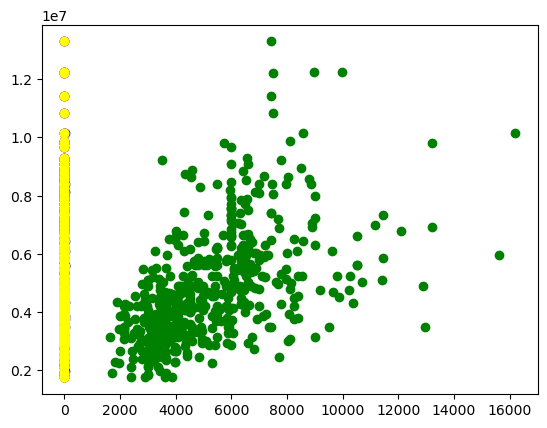

In [55]:
#6 Visualise the relationship between the independent variables and the depenedent variable using scatterplots
import matplotlib.pyplot as plt
plt.scatter(df.iloc[:,1],df.iloc[:,0], color="green")
plt.scatter(df.iloc[:,2],df.iloc[:,0] , color="blue")
plt.scatter(df.iloc[:,3],df.iloc[:,0], color="red")
plt.scatter(df.iloc[:,4],df.iloc[:,0], color="yellow")

plt.show()

In [56]:
#7 Encoding categorical data in X
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X.iloc[:,4] = le.fit_transform(X.iloc[:,4])
X.iloc[:,5] = le.fit_transform(X.iloc[:,5])
X.iloc[:,6] = le.fit_transform(X.iloc[:,6])
X.iloc[:,7] = le.fit_transform(X.iloc[:,7])
X.iloc[:,8] = le.fit_transform(X.iloc[:,8])
X.iloc[:,9] = le.fit_transform(X.iloc[:,9])
X.iloc[:,10] = le.fit_transform(X.iloc[:,10])
X.iloc[:,11] = le.fit_transform(X.iloc[:,11])

X


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,2
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,2
543,2910,3,1,1,0,0,0,0,0,0,0,0


In [57]:
#8  Avoiding the Dummy Variable Trap

X = pd.get_dummies(X,columns=['furnishingstatus'], drop_first=True)

In [58]:
# first five rows
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_1,furnishingstatus_2
0,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,7420,4,1,2,1,1,1,0,1,2,0,False,False


In [76]:
#9 Apply feature scaling on numerical variables
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
X

array([[ 1.04672629,  1.40341936,  1.42181174, ...,  1.80494113,
        -0.84488844, -0.6964292 ],
       [ 1.75700953,  1.40341936,  5.40580863, ..., -0.55403469,
        -0.84488844, -0.6964292 ],
       [ 2.21823241,  0.04727831,  1.42181174, ...,  1.80494113,
         1.18358821, -0.6964292 ],
       ...,
       [-0.70592066, -1.30886273, -0.57018671, ..., -0.55403469,
        -0.84488844,  1.43589615],
       [-1.03338891,  0.04727831, -0.57018671, ..., -0.55403469,
        -0.84488844, -0.6964292 ],
       [-0.5998394 ,  0.04727831, -0.57018671, ..., -0.55403469,
        -0.84488844,  1.43589615]])

In [79]:
#10 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)


In [81]:
#11 Fitting Multiple Linear Regression to the Training
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [83]:
#12 Predict on the train set and calculate the error = y_pred - y_train
y_pred=lr.predict(x_test)
error=y_pred-y_test



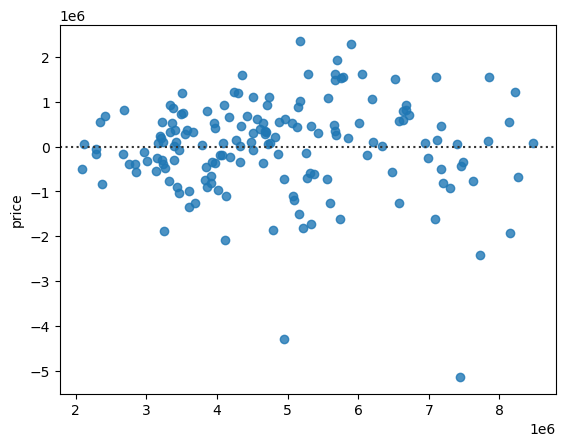

In [85]:
#13  Residual plot - plot y_pred in x axis and errors in y axis
import seaborn as sns
sns.residplot(x=y_pred, y=error)

plt.show()

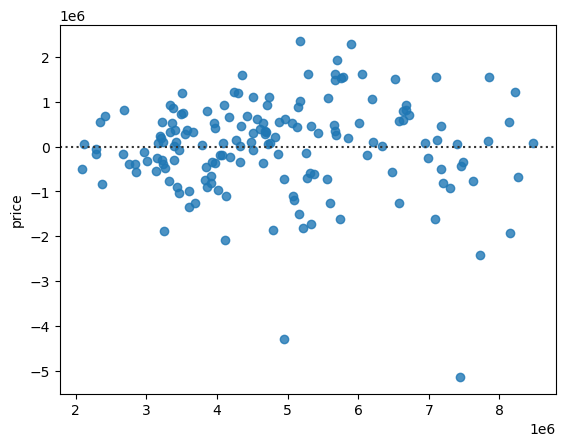

In [86]:
#14  Predic on the test set
y_pred=lr.predict(x_test)
error=y_pred-y_test
sns.residplot(x=y_pred,y=error)
plt.show()

In [65]:
#15 Residual plot - plot y_pred in x axis and errors in y axis

In [91]:
#16 Print Mean Squared Error and R Squared Value
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6406040622062092

In [93]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

1092455308092.9395

In [67]:
#17 Check  Adjusted R Squared Value(by selecting different no of input variables insted of all)
